In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file and convert into dataframe
df = pd.read_csv('glass.csv')
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# let's check the shape of the data
df.shape

(214, 11)

### We have 214 rows and 11 columns

In [4]:
df.columns

Index(['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [5]:
# let's check the null values
df.isna().sum()

ID               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

### There  is no null values present in this dataset

In [6]:
# let's check the unique values of all columns
df.nunique()

ID               214
RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type of glass      6
dtype: int64

In [7]:
# let's drop the id column
df.drop('ID',axis = 1,inplace = True)

## Checking Duplicate values

In [8]:
# let's check the duplicate rows present or not in this dataset
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type of glass
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0              1


### There is one duplicate row is present

In [9]:
# let's drop the duplicate row
df.drop_duplicates(inplace= True)

In [10]:
# let's check the shape
df.shape

(213, 10)

#### now, we have 213 rows and 10 columns

In [11]:
# summery about all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             213 non-null    float64
 1   Na             213 non-null    float64
 2   Mg             213 non-null    float64
 3   Al             213 non-null    float64
 4   Si             213 non-null    float64
 5   K              213 non-null    float64
 6   Ca             213 non-null    float64
 7   Ba             213 non-null    float64
 8   Fe             213 non-null    float64
 9   Type of glass  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


All features are float64 datatype and label is int64 datatype

In [12]:
# stats about data
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Observations

RI - data is very confusing

Na - Measure of central Tendency and Dispersion is looking satisfactory. 

Mg - Measure of central Tendency and Dispersion is looking satisfactory.

Al - max value of Al is indicates the presence of outliers.

Si - data is confusing.
 
K - max value of K is indicating the presence of outliers.

Ca - max value of Ca is indicating the presence of outliers.

Ba - Data is very confusing

Fe - Data is very confusing

Type of glass - it shows the categories  


# EDA

<AxesSubplot:title={'center':'Type of glass'}>

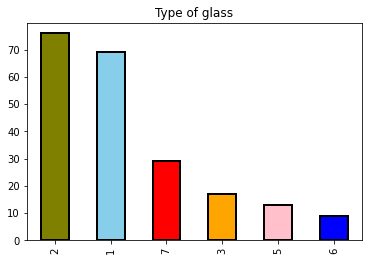

In [13]:
# let's visualize the type of glass categories
df['Type of glass'].value_counts().plot.bar(color=['olive','skyblue','red','orange','pink','blue'],title='Type of glass',edgecolor="k", linewidth=2)

In [14]:
df['Type of glass'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

### this column has 6 type of glass most of the data belongs to type 2 glass ,type 1 - 69 , type 7 - 29 ,type 3 - 17,type 5 - 13 and least no of data belongs to type 6 glass

<AxesSubplot:xlabel='Type of glass', ylabel='RI'>

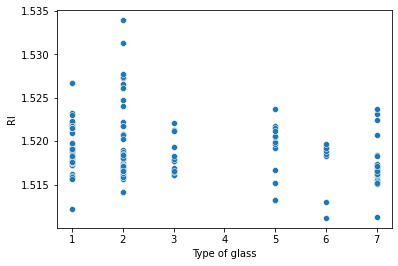

In [15]:
# let's visualize the relationship between RI and type of glass
sns.scatterplot(x = 'Type of glass',y = 'RI',data = df)


### we can clearly see the RI is equally distributed in the range 1.515 to 1.525 and most of the RI values belongs to type 2 glass

<AxesSubplot:xlabel='Type of glass', ylabel='Na'>

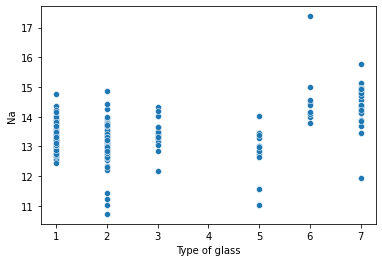

In [16]:
# let's visualize the relationship between Na and type of glass
sns.scatterplot(x = 'Type of glass',y = 'Na',data = df)

### we can clearly see the sodium is equally distributed in the range 12.5 to 15 and most of the Sodium belongs to type 2 glass

<AxesSubplot:xlabel='Type of glass', ylabel='Si'>

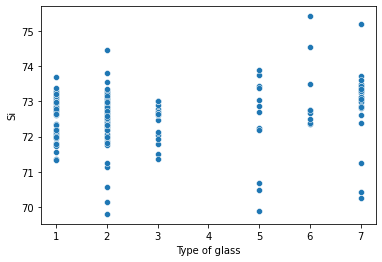

In [17]:
# let's visualize the relationship between Si and type of glass
sns.scatterplot(x = 'Type of glass',y = 'Si',data = df)

### we can clearly see the silicon is equally distributed in the range 71 to 74 and most of the Silicon belongs to type 2 glass

<AxesSubplot:xlabel='Type of glass', ylabel='Mg'>

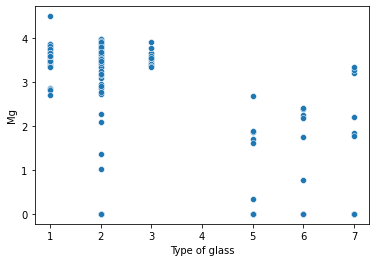

In [18]:
# let's visualize the relationship between Mg and type of glass
sns.scatterplot(x = 'Type of glass',y = 'Mg',data = df)

### we can clearly see the magnesium is equally distributed in the range 1.5 to 4 and most of the Magnesium belongs to type 2 glass

<AxesSubplot:xlabel='Type of glass', ylabel='Al'>

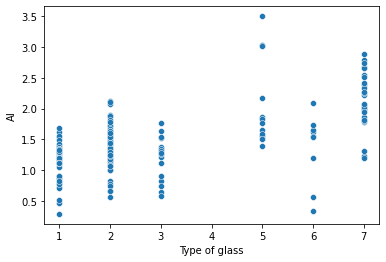

In [19]:
# let's visualize the relationship between Al and type of glass
sns.scatterplot(x = 'Type of glass',y = 'Al',data = df)

### we can clearly see the Aluminium is equally distributed in the range 0.5 to 3.0 

<AxesSubplot:xlabel='Type of glass', ylabel='K'>

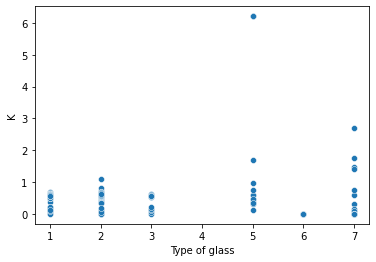

In [20]:
# let's visualize the relationship between K and type of glass
sns.scatterplot(x = 'Type of glass',y = 'K',data = df)

### we can clearly see the potassium is equally distributed in the range 0 to 1.5 

<AxesSubplot:xlabel='Type of glass', ylabel='Ca'>

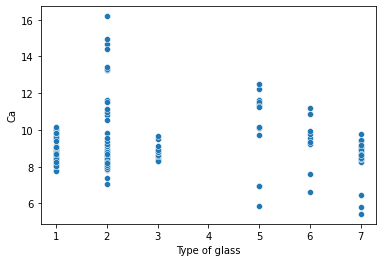

In [21]:
# let's visualize the relationship between Ca and type of glass
sns.scatterplot(x = 'Type of glass',y = 'Ca',data = df)

### we can clearly see the calcium is equally distributed in the range 6 to 14 and most of the calcium belongs to type 2 glass

<AxesSubplot:xlabel='Type of glass', ylabel='Ba'>

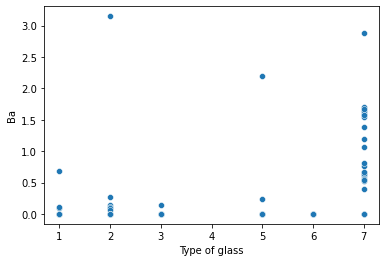

In [22]:
# let's visualize the relationship between Ba and type of glass
sns.scatterplot(x ='Type of glass',y ='Ba',data = df)

### we can clearly see the barium is equally distributed in the range 0.0 to 0.5 and most of the barium belongs to type 7 glass

<AxesSubplot:xlabel='Type of glass', ylabel='Fe'>

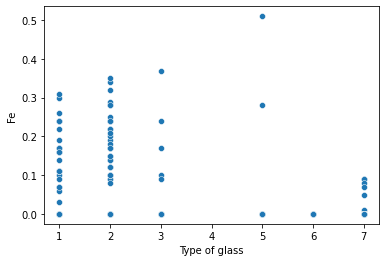

In [23]:
# let's visualize the relationship between Fe and type of glass
sns.scatterplot(x ='Type of glass',y ='Fe',data = df)

### we can clearly see the Iron is equally distributed in the range 0.0 to 0.3 and most of the Iron belongs to type 2 and type 1 glass

# Correlation

In [24]:
# let's check the correlation 
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type of glass,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


In [25]:
# let's check the correation with type of glass
df.corr()['Type of glass'].sort_values

<bound method Series.sort_values of RI              -0.160140
Na               0.508837
Mg              -0.744195
Al               0.597432
Si               0.147725
K               -0.012455
Ca               0.002677
Ba               0.574896
Fe              -0.191090
Type of glass    1.000000
Name: Type of glass, dtype: float64>

<AxesSubplot:>

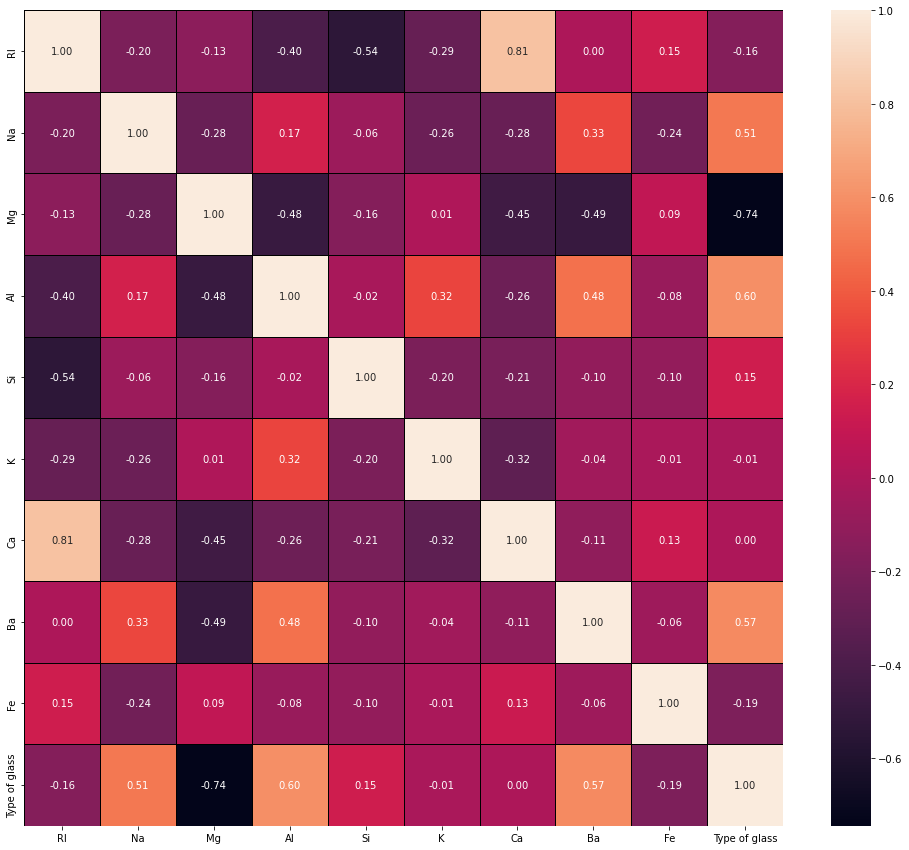

In [26]:
# let's check correlation using heatmap
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot =True,linewidth = 0.5,linecolor = 'black',fmt  = '.2f')

- Sodium,aluminium,silicon and barium are positivly correlated with type of glass
- RI , magnesium , Potassium and Iron are negatively correlated with type of glass
- maximum correlation : Aluminium
- minimum correlation : Calcium

## Outliers checking

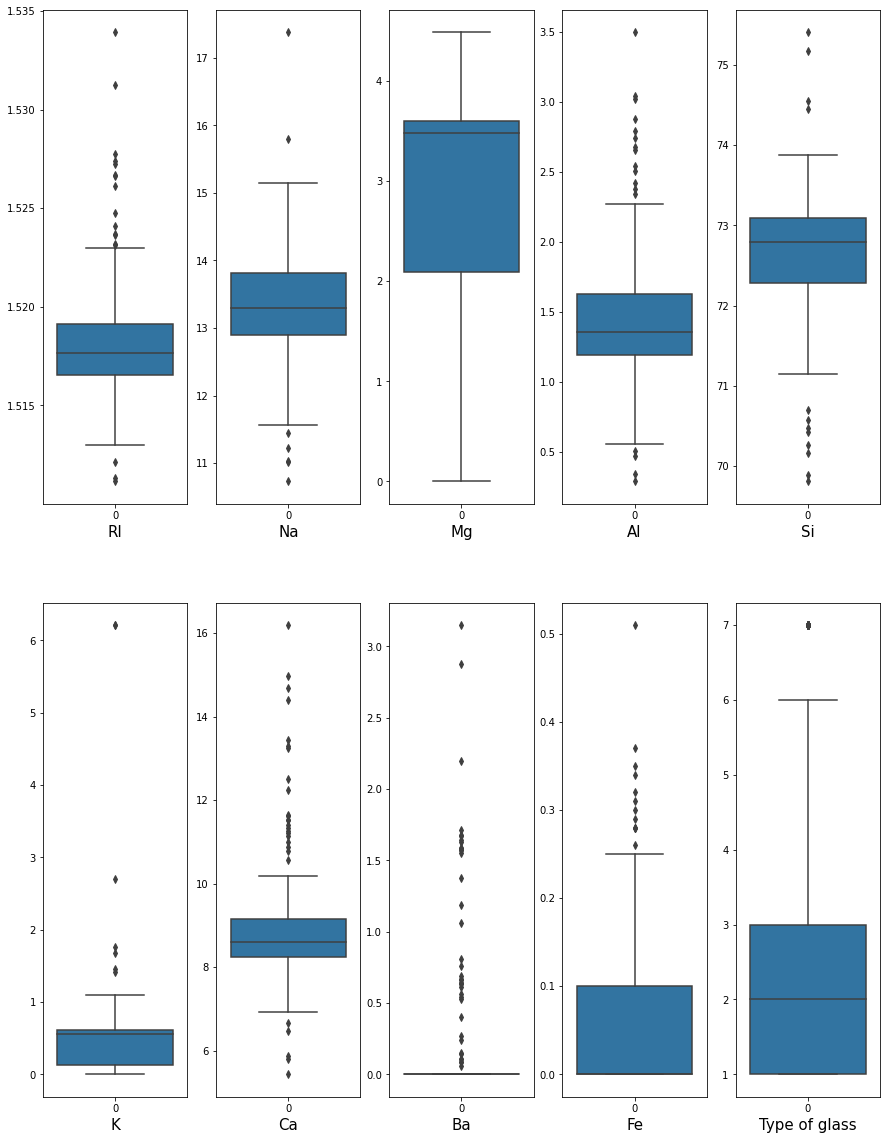

In [27]:
# let's visualize the outliers using boxplot
plt.figure(figsize = (15,20))
pn = 1
for col in df:
    if pn <=10:
        plt.subplot(2,5,pn)
        ax=sns.boxplot(data = df[col])
        plt.xlabel(col,fontsize= 15)
    pn += 1
plt.show()    

### Most of the features are having outliers, let's treat with outliers first...........

## Removing Outliers

### Z- score technique

In [28]:
from scipy.stats import zscore

In [29]:
z_score = zscore(df[['Ca','Ba','K','Fe','Si','Al','RI','Na']])

In [30]:
z= np.abs(z_score)

In [31]:
filtering_entry = (z<3).all(axis = 1)

In [32]:
df = df[filtering_entry]

In [33]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [34]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,193.000000,193.00000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,1.518040,13.41285,2.875130,1.427668,72.725544,0.433212,8.820777,0.123990,0.051865,2.626943
std,0.002275,0.67260,1.310355,0.439568,0.582325,0.282063,0.990259,0.357943,0.085924,2.032471
min,1.511310,11.03000,0.000000,0.290000,70.570000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516510,12.94000,2.850000,1.190000,72.380000,0.140000,8.240000,0.000000,0.000000,1.000000
50%,1.517630,13.30000,3.500000,1.360000,72.830000,0.560000,8.580000,0.000000,0.000000,2.000000
75%,1.518980,13.78000,3.610000,1.610000,73.090000,0.600000,9.070000,0.000000,0.090000,3.000000
max,1.527250,15.15000,4.490000,2.880000,74.550000,1.760000,12.500000,1.640000,0.320000,7.000000


In [35]:
df.shape

(193, 10)

## Percentage data loss

In [36]:
loss_percent = (213-193)/213*100
print(loss_percent,'%')

9.389671361502346 %


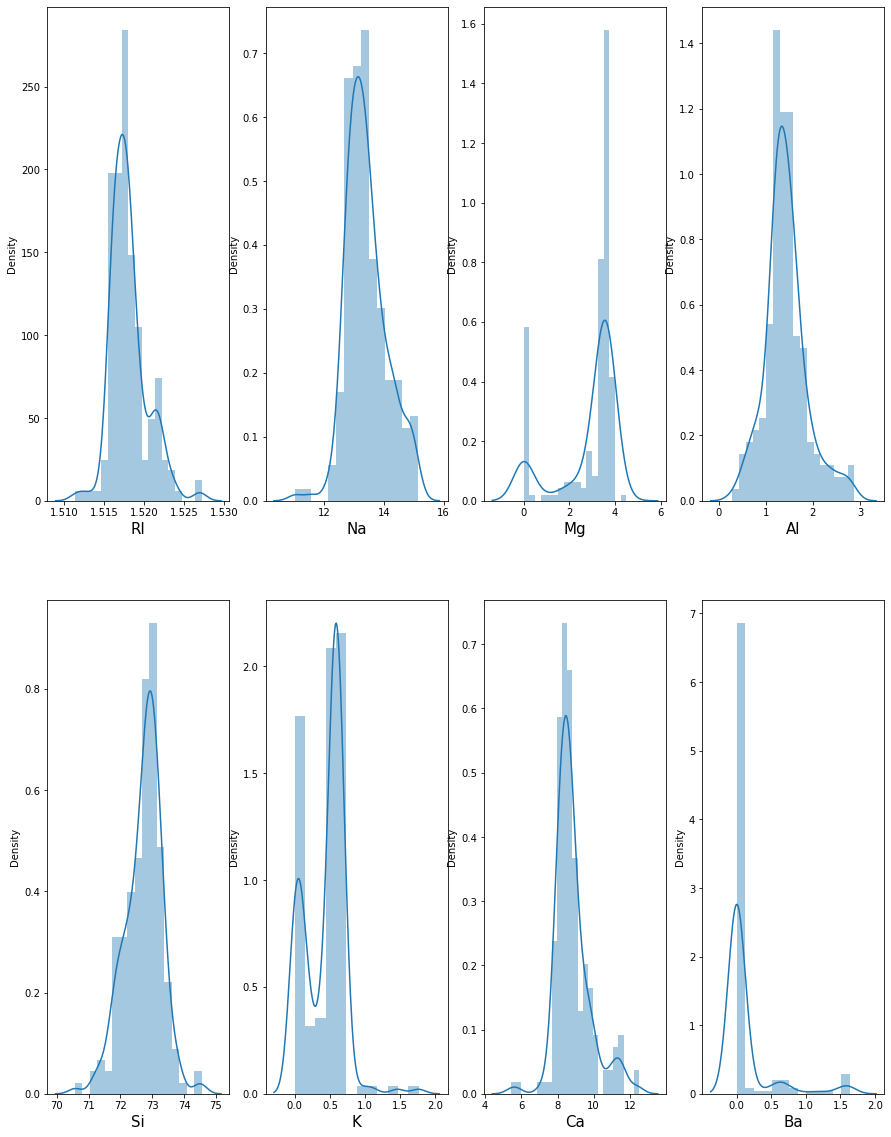

In [37]:
# let's visualize the data after removing outliers
plt.figure(figsize = (15,20))
pn = 1
for col in df:
    if pn <= 8:
        plt.subplot(2,4,pn)
        ax=sns.distplot(df[col])
        plt.xlabel(col,fontsize= 15)
    pn += 1
plt.show()    

### Now, looks better after removing the outliers

### Dividing data in features and label

In [38]:
x = df.drop('Type of glass',axis = 1)


In [39]:
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [40]:
y = df['Type of glass']

In [41]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type of glass, dtype: int64

## Best Random State

In [51]:
# lets import all necessary libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score

In [94]:
# maximum accuracy
max_accu = 0
# best random state value for which max accuracy is achived
max_rs = 0
for i in range(1,700):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.20,random_state = i)
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_train)
    score1 = accuracy_score(y_train,y_pred)
    pred = knn.predict(x_test)
    score=accuracy_score(y_test,pred)
    print('training score',score1,'testing score',score,'random state',i)
    if (score and score1) > max_accu:
        max_accu = score
        max_rs = i
        print('Training score',score1,'testing score',score,'random state',i)
    



training score 0.7272727272727273 testing score 0.8205128205128205 random state 1
Training score 0.7272727272727273 testing score 0.8205128205128205 random state 1
training score 0.7792207792207793 testing score 0.6153846153846154 random state 2
training score 0.7402597402597403 testing score 0.6666666666666666 random state 3
training score 0.7532467532467533 testing score 0.6666666666666666 random state 4
training score 0.7662337662337663 testing score 0.7692307692307693 random state 5
training score 0.7857142857142857 testing score 0.6410256410256411 random state 6
training score 0.7597402597402597 testing score 0.6923076923076923 random state 7
training score 0.7857142857142857 testing score 0.5897435897435898 random state 8
training score 0.7662337662337663 testing score 0.8461538461538461 random state 9
training score 0.7857142857142857 testing score 0.48717948717948717 random state 10
training score 0.7337662337662337 testing score 0.7692307692307693 random state 11
training scor

## Train Test Split

In [95]:
#split data into train and test, model will be build on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20,random_state = 5)


In [84]:
from sklearn.model_selection import cross_val_score

## Model Building using KNN

In [96]:
# creating object for KNeighbors
knn = KNeighborsClassifier()
# model training
knn.fit(x_train,y_train)
# predict the training score
y_pred = knn.predict(x_train)
print('Training score',accuracy_score(y_train,y_pred))
pred = knn.predict(x_test)
print('Testing score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Training score 0.7662337662337663
Testing score 0.7692307692307693
[[16  2  1  0  0]
 [ 1  8  0  0  0]
 [ 5  0  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0  5]]
              precision    recall  f1-score   support

           1       0.73      0.84      0.78        19
           2       0.80      0.89      0.84         9
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         5

    accuracy                           0.77        39
   macro avg       0.71      0.75      0.72        39
weighted avg       0.69      0.77      0.73        39



### After setting the random state = 5 , We got the accuracy score is 76%

##  Cross validation for KNN

In [104]:
cr2 = cross_val_score(knn,x,y,cv =15)
print("Cross validation score of KNN",cr2.mean())

Cross validation score of KNN 0.6636752136752136


### Difference between model accuracy and cross validation accuracy score is 10


## Model Building using Random Forest

In [60]:
# creating object for RandomForest
rf = RandomForestClassifier()
# model training
rf.fit(x_train,y_train)
# predict the training score
y_pred = rf.predict(x_train)
print('Training score',accuracy_score(y_train,y_pred))
pred = rf.predict(x_test)
print('Testing score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Training score 1.0
Testing score 0.7948717948717948
[[12  1  0  0  0]
 [ 2 12  1  0  0]
 [ 3  1  2  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  3]]
              precision    recall  f1-score   support

           1       0.71      0.92      0.80        13
           2       0.86      0.80      0.83        15
           3       0.67      0.33      0.44         6
           5       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.79        39
   macro avg       0.85      0.81      0.81        39
weighted avg       0.80      0.79      0.78        39



### After setting the random state = 1 , We got the accuracy score is 79% score is good but difference between training and testing score is more

## Cross validation for Random Forest

In [66]:
cr4 = cross_val_score(rf,x,y,cv = 15)
print("Cross validation score of Random Forest model",cr4.mean())

Cross validation score of Random Forest model 0.7658119658119659


### Difference between model accuracy and cross validation accuracy score is 3

## Model Building using Decision tree

In [67]:
# creating object for DecisionTree
dt = DecisionTreeClassifier()
# model training
dt.fit(x_train,y_train)
# predict the training score
y_pred = dt.predict(x_train)
print('Training score',accuracy_score(y_train,y_pred))
pred = dt.predict(x_test)
print('Testing score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Training score 1.0
Testing score 0.7435897435897436
[[14  3  1  0  0  0]
 [ 0  8  3  0  1  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       1.00      0.78      0.88        18
           2       0.62      0.67      0.64        12
           3       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.74        39
   macro avg       0.60      0.57      0.59        39
weighted avg       0.83      0.74      0.78        39



 ### After setting the random state 1 , We got the accuracy score is 74%

##  Cross validation for Decision Tree


In [75]:
cr3 = cross_val_score(dt,x,y,cv =15)
print("Cross validation score of Decision Tree model",cr3.mean())

Cross validation score of Decision Tree model 0.7034188034188034


### Difference between model accuracy and cross validation accuracy score is 4

## Model Building using ada boost

In [78]:
# creating object for AdaBOOst
ada = AdaBoostClassifier()
# model training
ada.fit(x_train,y_train)
# predict the training score
y_pred = ada.predict(x_train)
print('Training score',accuracy_score(y_train,y_pred))
pred = ada.predict(x_test)
print('Testing score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Training score 0.6688311688311688
Testing score 0.6410256410256411
[[9 1 0 0 1]
 [7 9 0 0 1]
 [1 2 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 7]]
              precision    recall  f1-score   support

           1       0.53      0.82      0.64        11
           2       0.69      0.53      0.60        17
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           7       0.78      1.00      0.88         7

    accuracy                           0.64        39
   macro avg       0.40      0.47      0.42        39
weighted avg       0.59      0.64      0.60        39



### After setting the random state = 119 , We got the accuracy score is 64%,i am not satisfied with this score

## Cross validation for ADA BOOST

In [82]:
cr5 = cross_val_score(ada,x,y,cv =12)
print("Cross validation score of ADA BOOST",cr5.mean())

Cross validation score of ADA BOOST 0.49234068627450983


### Difference between model accuracy and cross validation accuracy score is big

# as per my observation , Random Forest is best and model accuracy and cross val score difference  is also least

## HYPERPARAMETER TUNING

In [ ]:
RandomForestClassifier()

In [107]:
# Hyperparameter tuning using Random Forest
params = {'n_estimators':[100],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}

In [108]:
grd = GridSearchCV(rf,param_grid = params)
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11], 'n_estimators': [100]})

In [109]:
rf = grd.best_estimator_
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10)

In [110]:
pred = rf.predict(x_test)
accuracy_score(y_test,pred)

0.7692307692307693

##  Save the final model

In [111]:
import pickle

In [112]:
pickle.dump(rf,open('glass','wb'))

In [113]:
import joblib

In [114]:
joblib.dump(rf,'glass.pkl')

['glass.pkl']